<h2>Predict Tide Level Assignemnet<br><br>
Apurva Anand<br>
A04285700</h2>

We start by importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Reading training dataset<br>
I also resample the dataset to hourly datapoints by taking the mean off all data within an hour<br>
I fill up the missing/Nan values with linear interpolation

In [2]:
train = pd.read_csv("BHPtraining.csv", parse_dates =["Date Time"], index_col ="Date Time")
trainh = train.resample('H').mean()
trainh = trainh.interpolate(method='linear')
trainh

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,63.90,2.4475,0.1492,4.860,136.111111,5.355556
2017-01-01 01:00:00,63.98,2.2461,0.1629,4.237,134.200000,4.666000
2017-01-01 02:00:00,64.18,2.2506,0.1539,5.073,129.700000,5.404000
2017-01-01 03:00:00,64.30,2.1027,0.1608,5.015,112.200000,5.287000
2017-01-01 04:00:00,64.18,2.0279,0.1686,6.725,82.800000,7.115000
...,...,...,...,...,...,...
2019-12-31 19:00:00,59.56,0.5822,0.2331,14.929,27.500000,17.630000
2019-12-31 20:00:00,59.27,0.7208,0.2327,14.346,27.900000,17.027000
2019-12-31 21:00:00,59.08,0.9824,0.2450,13.550,28.200000,16.327000


In [3]:
trainh.isna().sum()

Air Temperature      0
Water Level          0
Water Level Sigma    0
Wind Speed           0
Wind Direction       0
Wind Gust            0
dtype: int64

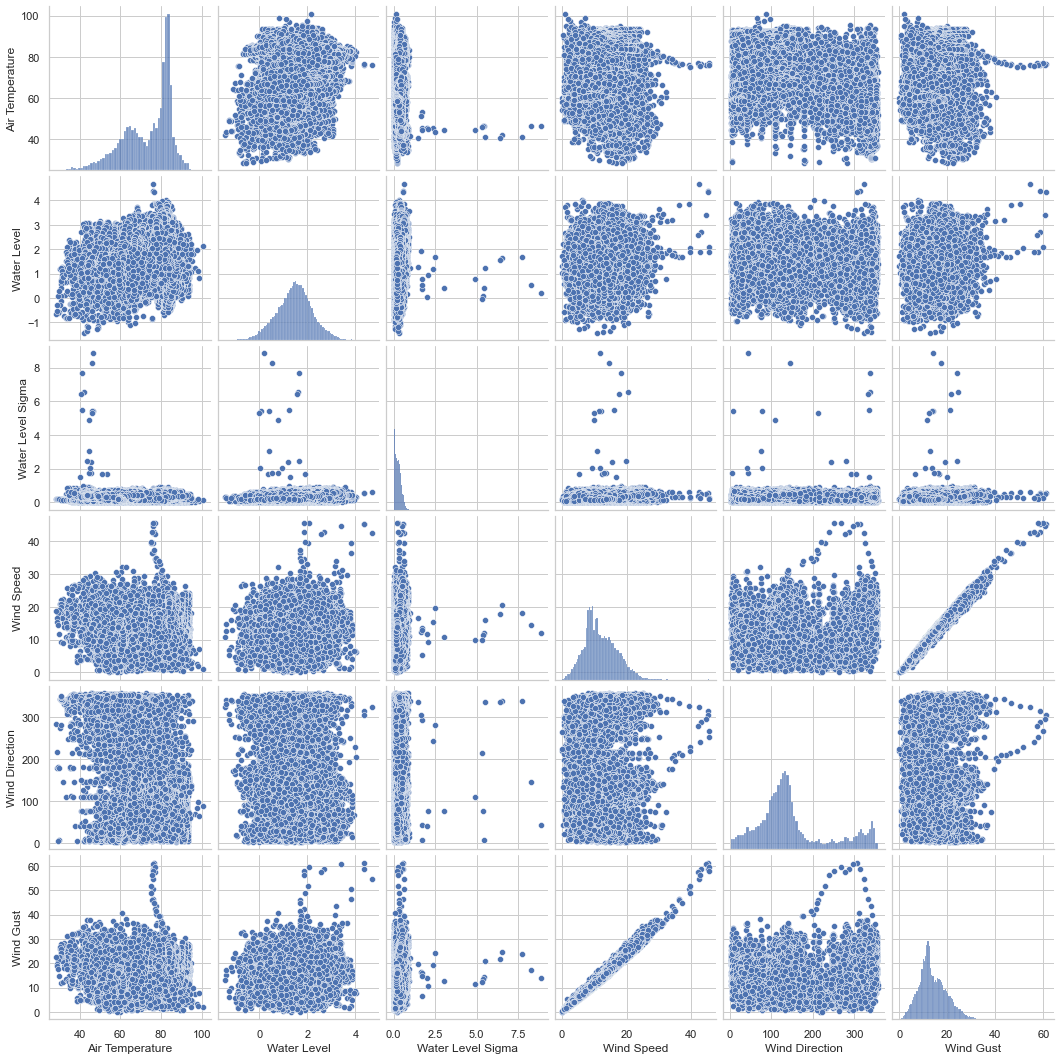

In [4]:
sns.pairplot(trainh)

Reading testing dataset<br>
I also resample the dataset to hourly datapoints by taking the mean off all data within an hour<br>
I fill up the missing/Nan values with linear interpolation

In [5]:
test = pd.read_csv("BHPtest.csv", parse_dates =["Date Time"], index_col ="Date Time")
testh = test.resample('H').mean()
testh = testh.interpolate(method='linear')
testh

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2020-01-01 00:00:00,59.180000,1.534800,0.207500,12.984000,30.900000,15.746000
2020-01-01 01:00:00,59.490000,1.636500,0.195800,12.265000,41.100000,14.385000
2020-01-01 02:00:00,59.960000,1.705300,0.182000,11.509000,43.600000,13.646000
2020-01-01 03:00:00,60.480000,1.627100,0.184000,10.865000,47.500000,12.830000
2020-01-01 04:00:00,60.920000,1.598100,0.181500,12.186000,51.000000,13.761000
...,...,...,...,...,...,...
2020-10-20 21:00:00,80.440000,1.858000,0.385200,12.091000,74.600000,13.783000
2020-10-20 22:00:00,79.770000,2.366700,0.380500,12.206000,78.600000,13.898000
2020-10-20 23:00:00,79.430000,2.721800,0.384300,12.497000,74.900000,14.228000


In [6]:
testh.isna().sum()

Air Temperature      0
Water Level          0
Water Level Sigma    0
Wind Speed           0
Wind Direction       0
Wind Gust            0
dtype: int64

Plotting a simple line graph to observe the trends in training data

Text(0, 0.5, 'Water Level')

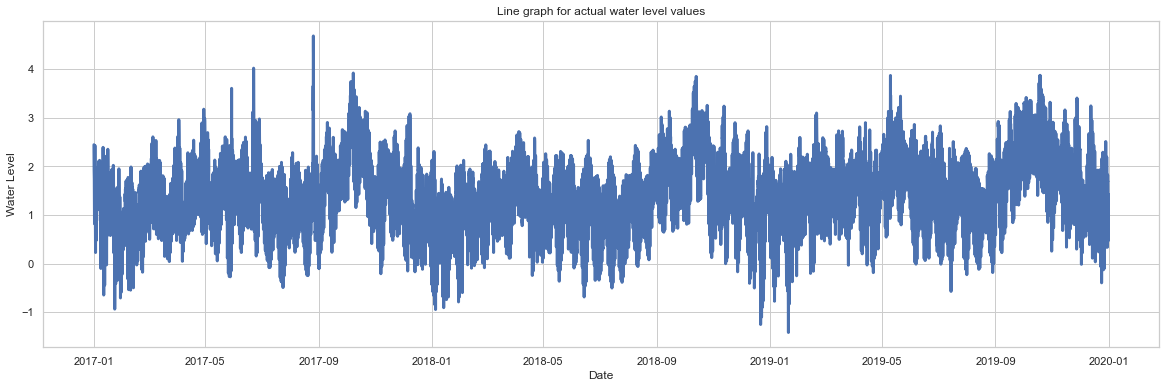

In [7]:
plt.figure(figsize=(20, 6))
plt.plot(trainh['Water Level'], linewidth=3)
plt.title("Line graph for actual water level values")
plt.xlabel('Date')
plt.ylabel('Water Level')

Plotting Seasonal Decomposition to look for trends and seasonal components in training data

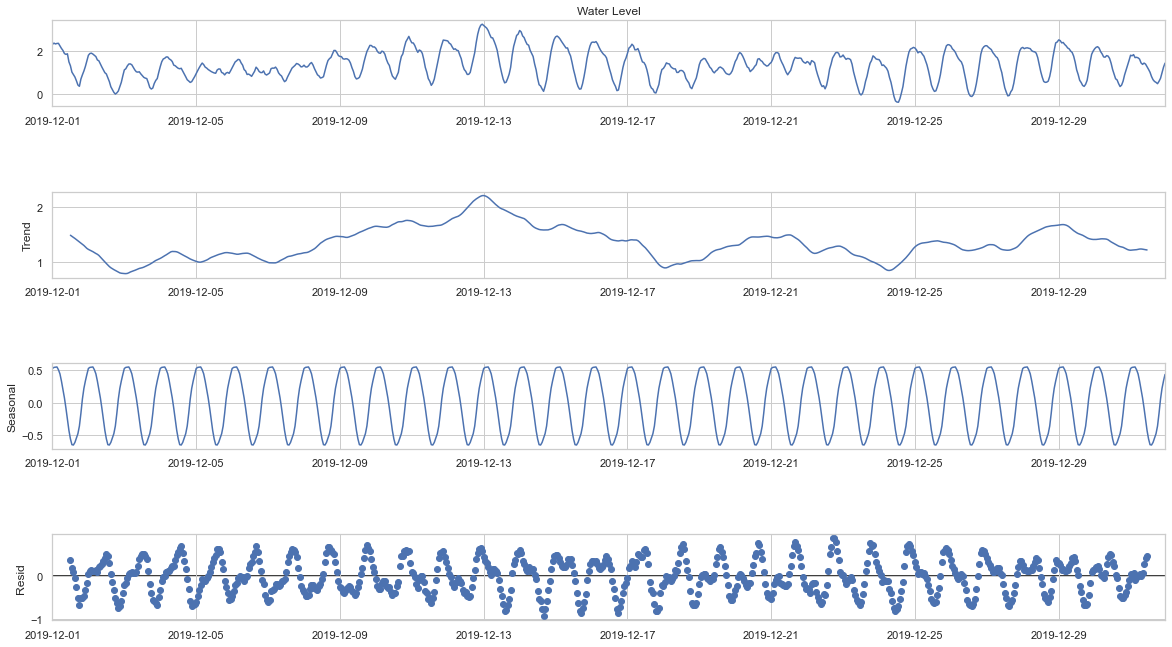

In [8]:
decomposition = seasonal_decompose(trainh['2019-12-1 0:0:0':'2019-12-31 23:0:0']['Water Level'], model = 'Additive')
fig = decomposition.plot()
fig.set_size_inches(18.5, 10.5)

Here we start dividing our datasets into training and testing datasets alongwith the features we want to use

In [9]:
X_train = trainh[['Air Temperature', 'Water Level Sigma', 'Wind Speed', 'Wind Direction', 'Wind Gust']]
X_test = testh[['Air Temperature', 'Water Level Sigma', 'Wind Speed', 'Wind Direction', 'Wind Gust']]
y_train = trainh[['Water Level']]
y_test = testh[['Water Level']]

Standardisation rescales our attributes so they have a mean of 0 and standard deviation of 1. It assumes that the distribution is Gaussian (it works better if it is), alternatively normalisation can be used to rescale between the range of 0 and 1<br>
We fit the scaler passing the training data but also request it transforms the data and returns it to a variable named "train_scaled"<br>
We then transform our test data with the same fitted scaler

In [10]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

<h3>Decision Trees</h3>

Decision trees learn how to best split the dataset into separate branches, allowing it to learn non-linear relationships.<br>
We create a Decision Tree and a Random Forest model<br>
We train it with our scaled training data and target values

In [11]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaled, y_train)

DecisionTreeRegressor()

<h4>Model Evaluation</h4><br>
We wish to understand how good our model is; there are a few different metrics we can use. We will evaluate mean squared error (MSE), mean absolute error (MAE), R2 and median absolute error.<br>
We calculate the errors for our training data

In [12]:
tree_mse = metrics.mean_squared_error(y_train, tree_model.predict(train_scaled))
tree_mae = metrics.mean_absolute_error(y_train, tree_model.predict(train_scaled))
tree_r2 = metrics.r2_score(y_train, tree_model.predict(train_scaled))
tree_median = metrics.median_absolute_error(y_train, tree_model.predict(train_scaled))
print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse), " & R2 = ", tree_r2, " & median abs error = ", tree_median)

Decision Tree training mse =  0.0  & mae =  0.0  & rmse =  0.0  & R2 =  1.0  & median abs error =  0.0


We can calculate the same on the test data to understand how we the models are generalised.

In [13]:
y_pred = tree_model.predict(test_scaled)
tree_test_mse = metrics.mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_test_mae = metrics.mean_absolute_error(y_test, tree_model.predict(test_scaled))
tree_test_r2 = metrics.r2_score(y_test, tree_model.predict(test_scaled))
tree_test_median = metrics.median_absolute_error(y_test, tree_model.predict(test_scaled))
print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse), " & R2 = ", tree_test_r2, " & median abs error = ", tree_test_median)

Decision Tree test mse =  1.0205175068693693  & mae =  0.7955834912651184  & rmse =  1.0102066654251343  & R2 =  -0.6680882548519276  & median abs error =  0.6683999999999999


<h4>Plots</h4><br>

Simple line graph to observe actual water levels

Text(0, 0.5, 'Water Level')

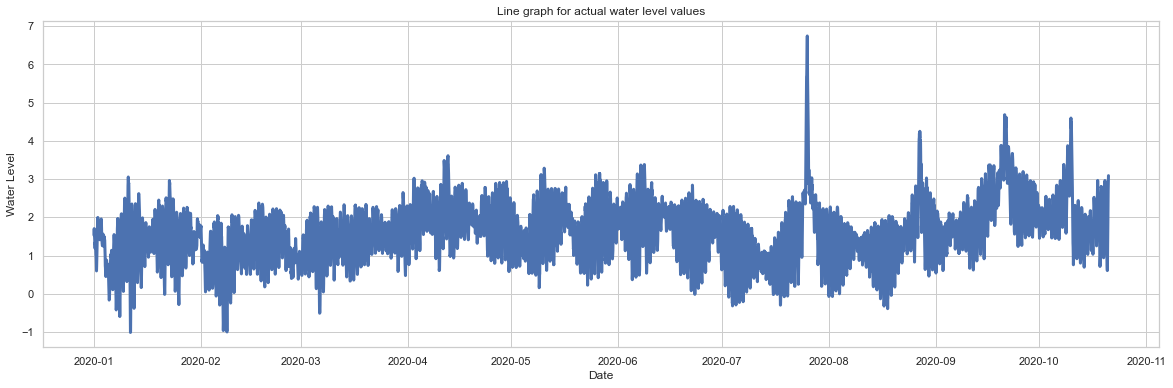

In [14]:
plt.figure(figsize=(20, 6))
plt.plot(y_test, linewidth=3)
plt.title("Line graph for actual water level values")
plt.xlabel('Date')
plt.ylabel('Water Level')

In [15]:
testh['y_pred'] = y_pred
testh

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust,y_pred
Date Time,,,,,,,
2020-01-01 00:00:00,59.180000,1.534800,0.207500,12.984000,30.900000,15.746000,0.5742
2020-01-01 01:00:00,59.490000,1.636500,0.195800,12.265000,41.100000,14.385000,1.7798
2020-01-01 02:00:00,59.960000,1.705300,0.182000,11.509000,43.600000,13.646000,1.4455
2020-01-01 03:00:00,60.480000,1.627100,0.184000,10.865000,47.500000,12.830000,1.4481
2020-01-01 04:00:00,60.920000,1.598100,0.181500,12.186000,51.000000,13.761000,1.4481
...,...,...,...,...,...,...,...
2020-10-20 21:00:00,80.440000,1.858000,0.385200,12.091000,74.600000,13.783000,2.3157
2020-10-20 22:00:00,79.770000,2.366700,0.380500,12.206000,78.600000,13.898000,2.3927
2020-10-20 23:00:00,79.430000,2.721800,0.384300,12.497000,74.900000,14.228000,2.0700


Simple line graph to observe predicted Water Level

Text(0, 0.5, 'Water Level')

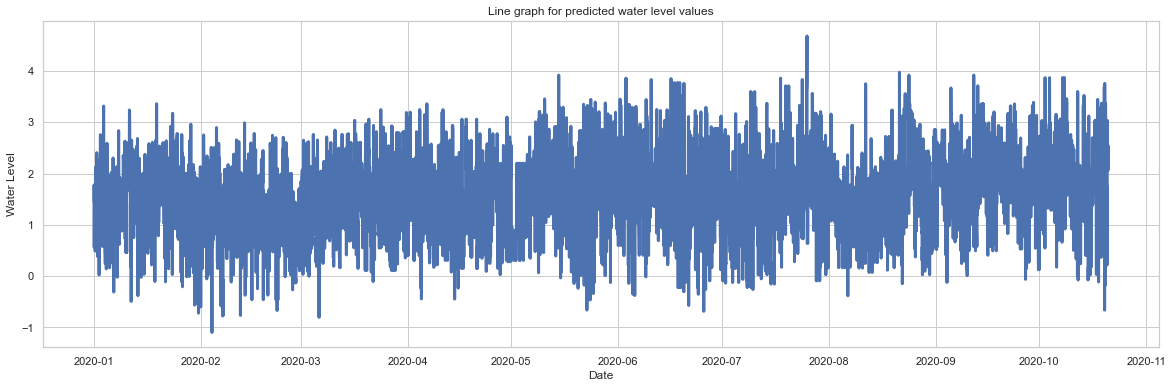

In [16]:
plt.figure(figsize=(20, 6))
plt.plot(testh['y_pred'], linewidth=3)
plt.title("Line graph for predicted water level values")
plt.xlabel('Date')
plt.ylabel('Water Level')

Overlapping Line charts for Actual Water Levels and Predicted ones

Text(0, 0.5, 'Water Level')

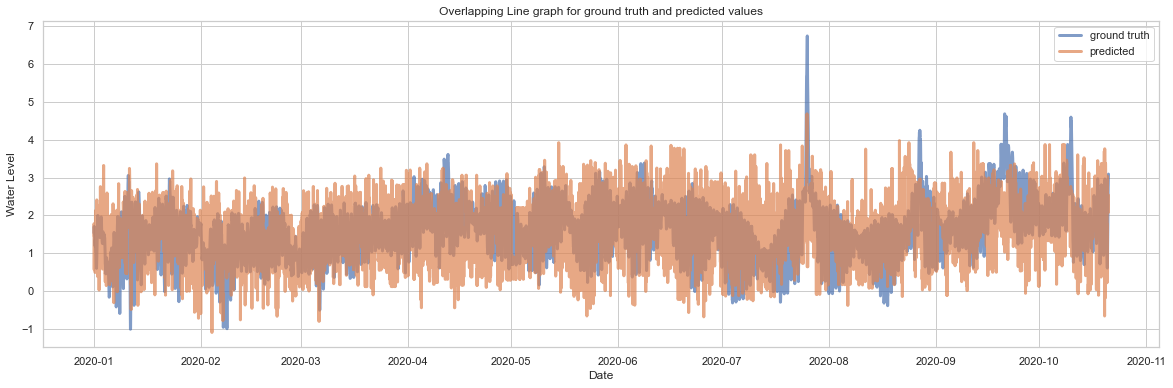

In [17]:
plt.figure(figsize=(20, 6))
plt.plot(y_test, linewidth=3, alpha = 0.7, label='ground truth')
plt.plot(testh['y_pred'], linewidth=3, alpha = 0.7, label='predicted')
plt.legend(loc='best')
plt.title("Overlapping Line graph for ground truth and predicted values")
plt.xlabel('Date')
plt.ylabel('Water Level')

Violin plot of the predicted Water Levels

Text(0.5, 1.0, 'violin plot for predicted water level')

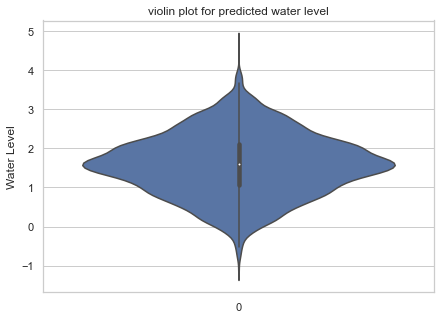

In [18]:
plt.subplots(figsize = (7,5))
sns.violinplot(data = y_pred, showfliers = False)
plt.ylabel("Water Level")
plt.title("violin plot for predicted water level")

Overlapping violin plots for Actual Water Levels and Predicted ones

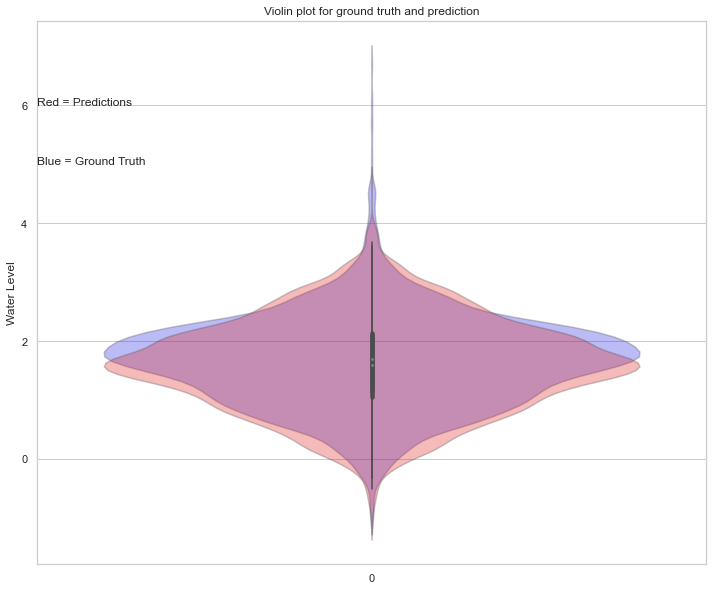

In [19]:
fig, axes1 = plt.subplots(figsize=(12, 10), sharex=True)
sns.violinplot(data=y_test, color = 'blue', label = 'Ground Truth')

sns.violinplot(data=testh['y_pred'], color = 'red', label='predicted')
plt.setp(axes1.collections, alpha=.3)
plt.text(-0.5, 5, "Blue = Ground Truth", fontsize=12)
plt.text(-0.5, 6, "Red = Predictions", fontsize=12)
plt.ylabel("Water Level")
plt.title("Violin plot for ground truth and prediction")
plt.show()

Text(-1.5, 4, 'MSE = 1.021')

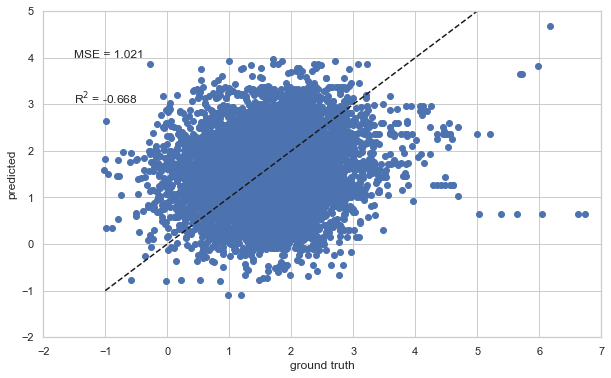

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(y_test["Water Level"], testh["y_pred"], 'o')
plt.plot([-1, 7], [-1, 7], 'k--')
plt.axis([-2, 7, -2, 5])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % tree_model.score(test_scaled, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, testh['y_pred'])
plt.text(-1.5, 3, scorestr, fontsize=12)
plt.text(-1.5, 4, errstr, fontsize=12)

<h3>Trying out Random Forest</h3>

In [21]:
rfm = RandomForestRegressor()
rfm.fit(train_scaled, y_train)

C:\Users\apurv\AppData\Local\Temp\ipykernel_15932\849170312.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfm.fit(train_scaled, y_train)


RandomForestRegressor()

In [22]:
rfm_mse = metrics.mean_squared_error(y_train, rfm.predict(train_scaled))
rfm_mae = metrics.mean_absolute_error(y_train, rfm.predict(train_scaled))
rfm_r2 = metrics.r2_score(y_train, rfm.predict(train_scaled))
rfm_median = metrics.median_absolute_error(y_train, rfm.predict(train_scaled))
print("Random Forest training mse = ", rfm_mse," & mae = ",rfm_mae," & rmse = ", sqrt(rfm_mse), " & R2 = ", rfm_r2, " & median abs error = ", rfm_median)

Random Forest training mse =  0.0378442685657352  & mae =  0.14212570917047182  & rmse =  0.19453603410611414  & R2 =  0.9283575718835715  & median abs error =  0.10222950000000075


In [23]:
y_rfm_pred = rfm.predict(test_scaled)
rfm_test_mse = metrics.mean_squared_error(y_test, rfm.predict(test_scaled))
rfm_test_mae = metrics.mean_absolute_error(y_test, rfm.predict(test_scaled))
rfm_test_r2 = metrics.r2_score(y_test, rfm.predict(test_scaled))
rfm_test_median = metrics.median_absolute_error(y_test, rfm.predict(test_scaled))
print("Random Forest test mse = ",rfm_test_mse," & mae = ",rfm_test_mae," & rmse = ", sqrt(rfm_test_mse), " & R2 = ", rfm_test_r2, " & median abs error = ", rfm_test_median)

Random Forest test mse =  0.5823159664854607  & mae =  0.5947805245449271  & rmse =  0.7630963022354784  & R2 =  0.048174658671991555  & median abs error =  0.48269350000000044


In [24]:
testh['y_rmf_pred'] = y_rfm_pred
testh

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust,y_pred,y_rmf_pred
Date Time,,,,,,,,
2020-01-01 00:00:00,59.180000,1.534800,0.207500,12.984000,30.900000,15.746000,0.5742,0.810249
2020-01-01 01:00:00,59.490000,1.636500,0.195800,12.265000,41.100000,14.385000,1.7798,0.965297
2020-01-01 02:00:00,59.960000,1.705300,0.182000,11.509000,43.600000,13.646000,1.4455,1.369161
2020-01-01 03:00:00,60.480000,1.627100,0.184000,10.865000,47.500000,12.830000,1.4481,1.370011
2020-01-01 04:00:00,60.920000,1.598100,0.181500,12.186000,51.000000,13.761000,1.4481,1.368869
...,...,...,...,...,...,...,...,...
2020-10-20 21:00:00,80.440000,1.858000,0.385200,12.091000,74.600000,13.783000,2.3157,2.311277
2020-10-20 22:00:00,79.770000,2.366700,0.380500,12.206000,78.600000,13.898000,2.3927,2.567354
2020-10-20 23:00:00,79.430000,2.721800,0.384300,12.497000,74.900000,14.228000,2.0700,2.291737


Text(0, 0.5, 'Water Level')

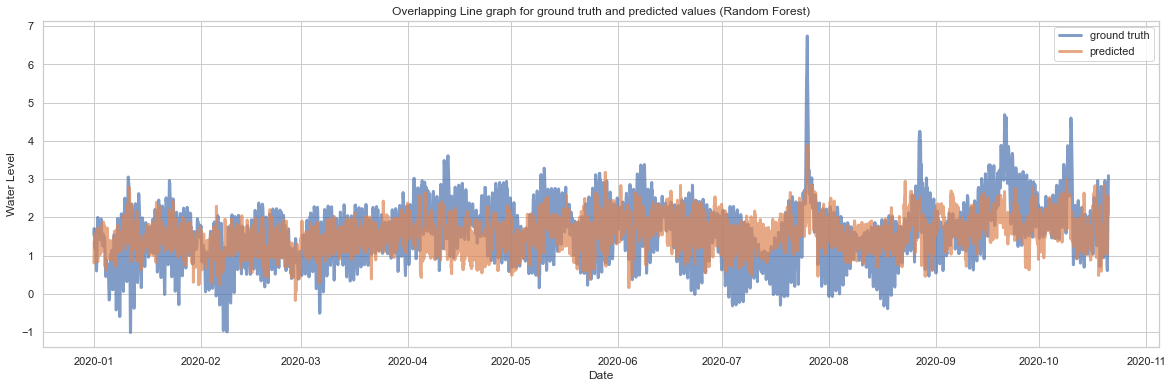

In [25]:
plt.figure(figsize=(20, 6))
plt.plot(y_test, linewidth=3, alpha = 0.7, label='ground truth')
plt.plot(testh['y_rmf_pred'], linewidth=3, alpha = 0.7, label='predicted')
plt.legend(loc='best')
plt.title("Overlapping Line graph for ground truth and predicted values (Random Forest)")
plt.xlabel('Date')
plt.ylabel('Water Level')

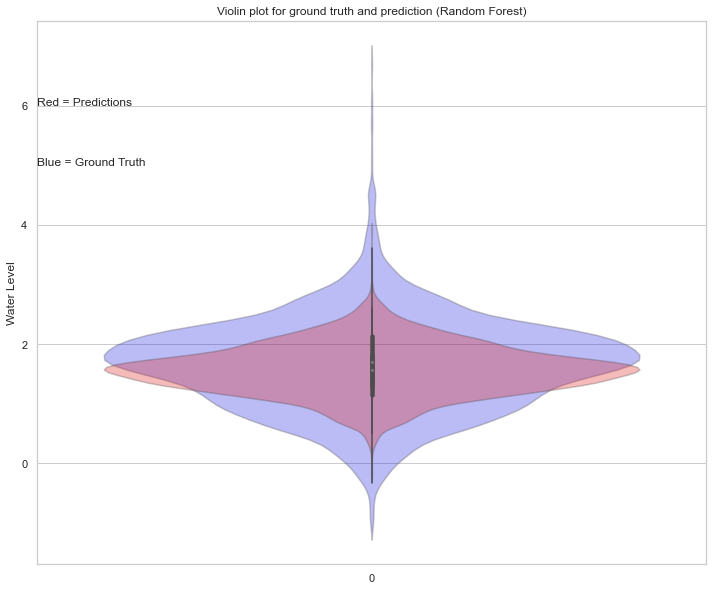

In [26]:
fig, axes1 = plt.subplots(figsize=(12, 10), sharex=True)
sns.violinplot(data=y_test, color = 'blue', label = 'Ground Truth')

sns.violinplot(data=testh['y_rmf_pred'], color = 'red', label='predicted')
plt.setp(axes1.collections, alpha=.3)
plt.text(-0.5, 5, "Blue = Ground Truth", fontsize=12)
plt.text(-0.5, 6, "Red = Predictions", fontsize=12)
plt.ylabel("Water Level")
plt.title("Violin plot for ground truth and prediction (Random Forest)")
plt.show()

<h3>Decision tree with different features</h3>

In [27]:
X_train_new = trainh[['Water Level Sigma', 'Wind Speed', 'Wind Gust']]
X_test_new = testh[['Water Level Sigma', 'Wind Speed', 'Wind Gust']]

In [28]:
train_scaled_new = scaler.fit_transform(X_train_new)
test_scaled_new = scaler.transform(X_test_new)

In [29]:
tree_model.fit(train_scaled_new, y_train)

DecisionTreeRegressor()

In [30]:
tree_new_mse = metrics.mean_squared_error(y_train, tree_model.predict(train_scaled_new))
tree_new_mae = metrics.mean_absolute_error(y_train, tree_model.predict(train_scaled_new))
tree_new_r2 = metrics.r2_score(y_train, tree_model.predict(train_scaled_new))
tree_new_median = metrics.median_absolute_error(y_train, tree_model.predict(train_scaled_new))
print("Decision Tree training mse = ",tree_new_mse," & mae = ",tree_new_mae," & rmse = ", sqrt(tree_new_mse), " & R2 = ", tree_new_r2, " & median abs error = ", tree_new_median)

Decision Tree training mse =  0.0  & mae =  0.0  & rmse =  0.0  & R2 =  1.0  & median abs error =  0.0


In [31]:
y_pred_new = tree_model.predict(test_scaled_new)
tree_test_new_mse = metrics.mean_squared_error(y_test, tree_model.predict(test_scaled_new))
tree_test_new_mae = metrics.mean_absolute_error(y_test, tree_model.predict(test_scaled_new))
tree_test_new_r2 = metrics.r2_score(y_test, tree_model.predict(test_scaled_new))
tree_test_new_median = metrics.median_absolute_error(y_test, tree_model.predict(test_scaled_new))
print("Decision Tree test mse = ",tree_test_new_mse," & mae = ",tree_test_new_mae," & rmse = ", sqrt(tree_test_new_mse), " & R2 = ", tree_test_new_r2, " & median abs error = ", tree_test_new_median)

Decision Tree test mse =  1.0549450704260899  & mae =  0.8144536412019233  & rmse =  1.027105189562437  & R2 =  -0.7243618748786  & median abs error =  0.6787


In [32]:
testh['y_pred_new'] = y_pred_new

Text(0, 0.5, 'Water Level')

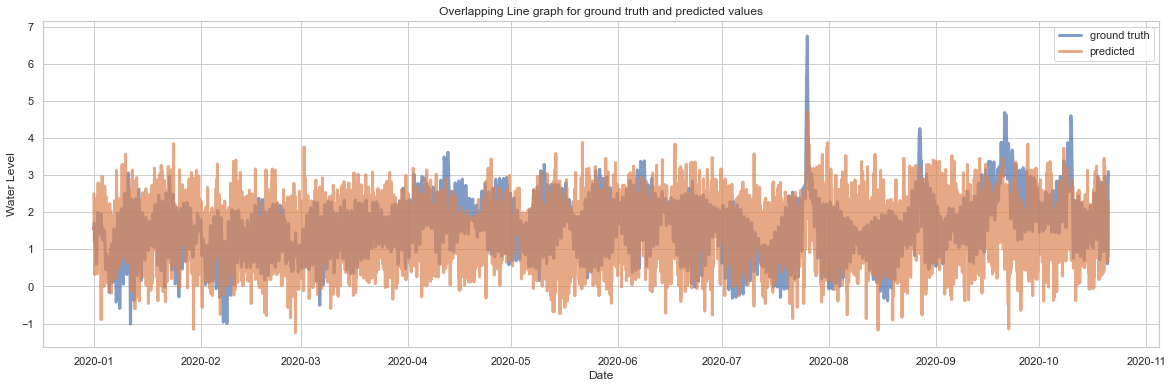

In [33]:
plt.figure(figsize=(20, 6))
plt.plot(y_test, linewidth=3, alpha = 0.7, label='ground truth')
plt.plot(testh['y_pred_new'], linewidth=3, alpha = 0.7, label='predicted')
plt.legend(loc='best')
plt.title("Overlapping Line graph for ground truth and predicted values")
plt.xlabel('Date')
plt.ylabel('Water Level')

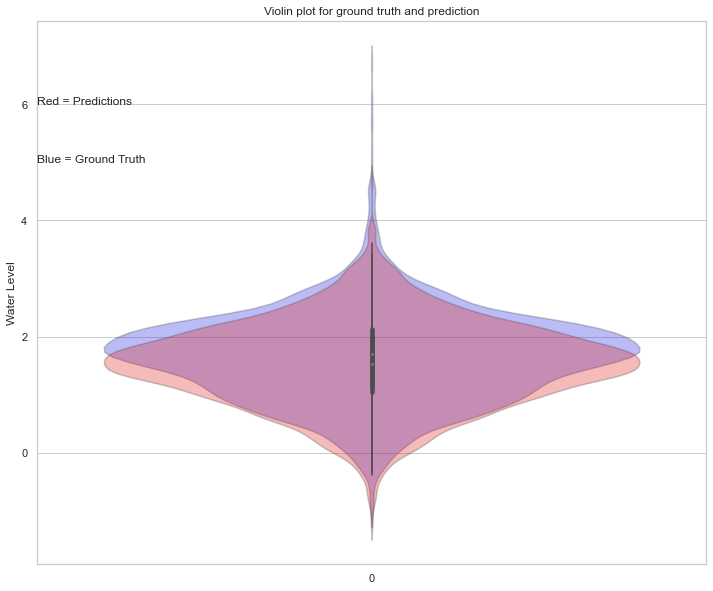

In [34]:
fig, axes1 = plt.subplots(figsize=(12, 10), sharex=True)
sns.violinplot(data=y_test, color = 'blue', label = 'Ground Truth')

sns.violinplot(data=testh['y_pred_new'], color = 'red', label='predicted')
plt.setp(axes1.collections, alpha=.3)
plt.text(-0.5, 5, "Blue = Ground Truth", fontsize=12)
plt.text(-0.5, 6, "Red = Predictions", fontsize=12)
plt.ylabel("Water Level")
plt.title("Violin plot for ground truth and prediction")
plt.show()